In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress

#import api_key
#from api_keys import api_key



In [3]:
#Is a Country’s GDP have any correlation to the Country’s Olympic performance? (Louis)
     #1. Describe the anlysis process (code used to analyize the data)
     #2.Summary of conclusions (incld. visisualization - plots) implications of your findings

In [4]:
#What is the percentage of GDP spent by the Country? Do the Olympic games have an adverse or beneficial effect on the host Country’s GDP? (Jacob)
     #1. Describe the anlysis process (code used to analyize the data)
     #2.Summary of conclusions (incld. visisualization - plots) implications of your findings


In [5]:
#How do major events(wars) affect the Country’s Olympic performance & attendance? (Nico)
     #1. Describe the anlysis process (code used to analyize the data)
     #2.Summary of conclusions (incld. visisualization - plots) implications of your findings


athlete_data_to_load = 'raw data files/Olympic data/athlete_events.csv'
summer_data_to_load = 'raw data files/Olympic data/summer.csv'
winter_data_to_load = 'raw data files/Olympic data/winter.csv'

athlete_data = pd.read_csv(athlete_data_to_load)
summer_data = pd.read_csv(summer_data_to_load)
winter_data = pd.read_csv(summer_data_to_load)

In [6]:
athlete_data_grouped = athlete_data.groupby('Team')
athlete_data_grouped.count().sort_values(by = 'Name', ascending = False).head(10)




,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
Team,,,,,,,,,,,,,,
United States,17847,17847,17847,17610,14295,13791,17847,17847,17847,17847,17847,17847,17847,5219
France,11988,11988,11988,10877,8096,7853,11988,11988,11988,11988,11988,11988,11988,1550
Great Britain,11404,11404,11404,10731,7667,7574,11404,11404,11404,11404,11404,11404,11404,1673
Italy,10260,10260,10260,9922,7772,7462,10260,10260,10260,10260,10260,10260,10260,1527
Germany,9326,9326,9326,9180,7092,7032,9326,9326,9326,9326,9326,9326,9326,1984
Canada,9279,9279,9279,9108,7825,7709,9279,9279,9279,9279,9279,9279,9279,1243
Japan,8289,8289,8289,8173,7408,7348,8289,8289,8289,8289,8289,8289,8289,911
Sweden,8052,8052,8052,8048,5373,5277,8052,8052,8052,8052,8052,8052,8052,1434
Australia,7513,7513,7513,7405,6629,6527,7513,7513,7513,7513,7513,7513,7513,1306


In [7]:
athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# United States

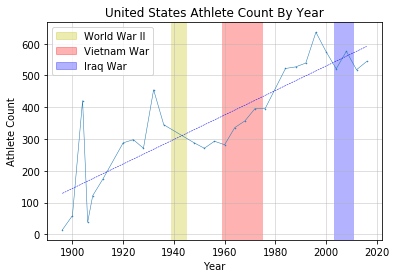

In [12]:
import matplotlib.patches as mpatches

usa_data = athlete_data.loc[athlete_data['Team']=='United States']
usa_summer_data = usa_data.loc[usa_data['Season']=='Summer'].groupby(['Year'])['ID'].nunique()
usa_summer_data_df = pd.DataFrame(usa_summer_data).rename(columns = {'ID':'Athlete Count'})
usa_winter_data = usa_data.loc[usa_data['Season']=='Winter'].groupby(['Year'])['ID'].nunique()
usa_winter_data_df = pd.DataFrame(usa_winter_data).rename(columns = {'ID':'Athlete Count'})

(slope, intercept, _, _, _) = linregress(usa_summer_data_df.index,  usa_summer_data_df['Athlete Count'])
fit = slope * usa_summer_data_df.index + intercept

plt.plot(usa_summer_data_df.index, usa_summer_data_df['Athlete Count'], marker = 'o',markersize = 0.5, linewidth = 0.5)
plt.plot(usa_summer_data_df.index, fit, 'b--', linewidth = 0.5)

grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'y')
vietnam = plt.axvspan(1959,1975,0,1, alpha = 0.3, facecolor = 'r')
iraq = plt.axvspan(2003, 2011, 0, 1, alpha = 0.3, facecolor = 'b', label = 'Iraq War')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='World War II')
red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'Vietnam War')
blue_patch = mpatches.Patch(color = 'b', alpha = 0.3, label = 'Iraq War')


plt.legend(handles=[yellow_patch, red_patch, blue_patch])
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.title('United States Athlete Count By Year')

plt.show()




#plt.plot(winter_data_df.index, winter_data_df['Athlete Count'], marker = 'o', markersize = 0.5, linewidth = 0.5)





    
    
    

# Soviet Union/Russia

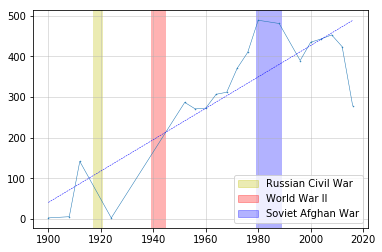

In [9]:
soviet_data = athlete_data.loc[athlete_data['Team'].isin(['Russia','Soviet Union'])]
soviet_summer_data = soviet_data.loc[soviet_data['Season']=='Summer'].groupby(['Year'])['ID'].nunique()
soviet_summer_data_df = pd.DataFrame(soviet_summer_data).rename(columns = {'ID':'Athlete Count'})

(slope, intercept, _, _, _) = linregress(soviet_summer_data_df.index,  soviet_summer_data_df['Athlete Count'])
fit = slope * soviet_summer_data_df.index + intercept

plt.plot(soviet_summer_data_df.index, soviet_summer_data_df['Athlete Count'], marker = 'o',linewidth = 0.5, markersize = 0.5,)
plt.plot(soviet_summer_data_df.index, fit, 'b--', linewidth = 0.5)

grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwI = plt.axvspan(1917,1921,0,1, alpha = 0.3, facecolor = 'y')
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'r')
soviet_afghan = plt.axvspan(1979, 1989, 0, 1, alpha = 0.3, facecolor = 'b')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='Russian Civil War')
red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'World War II')
blue_patch = mpatches.Patch(color = 'b', alpha = 0.3, label = 'Soviet Afghan War')


plt.legend(handles=[yellow_patch, red_patch, blue_patch])




    

# Germany

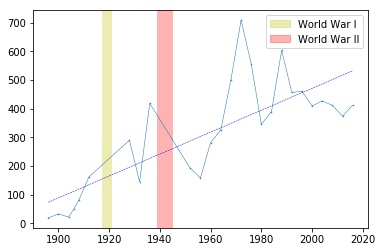

In [10]:
germany_data = athlete_data.loc[athlete_data['Team'].isin(['Germany','East Germany', 'West Germany'])]
germany_summer_data = germany_data.loc[germany_data['Season']=='Summer'].groupby(['Year'])['ID'].nunique()
germany_summer_data_df = pd.DataFrame(germany_summer_data).rename(columns = {'ID':'Athlete Count'})

(slope, intercept, _, _, _) = linregress(germany_summer_data_df.index,  germany_summer_data_df['Athlete Count'])
fit = slope * germany_summer_data_df.index + intercept

plt.plot(germany_summer_data_df.index, germany_summer_data_df['Athlete Count'], marker = 'o',linewidth = 0.5, markersize = 0.5,)
plt.plot(germany_summer_data_df.index, fit, 'b--', linewidth = 0.5)

#grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwI = plt.axvspan(1917,1921,0,1, alpha = 0.3, facecolor = 'y')
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'r')
#iraq = plt.axvspan(1979, 1989, 0, 1, alpha = 0.3, facecolor = 'b')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='World War I')
red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'World War II')
#blue_patch = mpatches.Patch(color = 'b', alpha = 0.3, label = 'Soviet Afghan War')


plt.legend(handles=[yellow_patch, red_patch], loc = 'best')



In [11]:
germany_summer_data

Year
1896     19
1900     33
1904     22
1906     49
1908     80
1912    162
1928    290
1932    145
1936    419
1952    192
1956    159
1960    282
1964    326
1968    501
1972    709
1976    557
1980    346
1984    390
1988    604
1992    457
1996    461
2000    410
2004    427
2008    412
2012    374
2016    413
Name: ID, dtype: int64

In [14]:
summer_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Silver
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Gold
Silver
Bronze
Gold
Silver
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Gold
Silver
Bronze
Gold
Silver
Gold
Silver
Gold
Silver
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Si

Silver
Silver
Bronze
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Si

Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze


Silver
Silver
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bro

Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Bronze
Bronze
Gold
Gold
Gold
Silver
Silver
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze

Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Gold
Silver
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Gold
Gold
Silver
Bronze
Bronze
Bronze
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Silver
Silver
Silver
Silver
Gold
Gold
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Br

Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Go

Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Gold
Silver

Gold
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Gold
Silver
Bronze
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Si

Gold
Silver
Bronze
Gold
Silver
Gold
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silve

Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronz

Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Gold
Gold
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronze
Bronz

Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Gold
Gold
Gold
Gold
Gold
Gold
Silver
Silver
Silver
Silver
Silver
Silver
Bronze
Bronze
Bronze
Bronze
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Bronze
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
Bronze
Gold
Silver
